In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

### Extracting data from files and putting into DataFrames

In [5]:
#xls = pd.ExcelFile('FitbitData/2014-08.xls')
#activities = xls.parse('Activities', index_col=0, parse_dates=True)
#sleep = xls.parse('Sleep', usecols=':F', index_col=[0,1], parse_dates=True)

xls_files = glob.glob('FitbitData/*.xls')
activities = [pd.ExcelFile(xls).parse('Activities', index_col=0, parse_dates=True) for xls in xls_files]
sleep = [pd.ExcelFile(xls).parse('Sleep', usecols=':F') for xls in xls_files]
#sleep = [pd.ExcelFile(xls).parse('Sleep', usecols=':F', index_col=[0,1], parse_dates=True) for xls in xls_files]

activities_df = pd.DataFrame()
sleep_df = pd.DataFrame()

for monthly_activity in activities:
    df = pd.DataFrame(monthly_activity)
    activities_df = activities_df.append(df)
    
for monthly_sleep in sleep:
    monthly_sleep = monthly_sleep.sort_index(ascending=True)
    df = pd.DataFrame(monthly_sleep)
    sleep_df = sleep_df.append(df)
    
activities_df.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-08-01,"1,344",0,0.0,0,"1,440",0,0,0,0
2014-08-02,"1,344",0,0.0,0,"1,440",0,0,0,0
2014-08-03,"1,344",0,0.0,0,"1,440",0,0,0,0
2014-08-04,"1,344",0,0.0,0,"1,440",0,0,0,0
2014-08-05,"1,344",0,0.0,0,"1,440",0,0,0,0


In [75]:
sleep_df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
0,2014-08-31 12:58AM,2014-08-31 8:10AM,401,18,1,432
1,2014-08-30 2:08AM,2014-08-30 10:33AM,437,23,5,505
2,2014-08-23 10:46PM,2014-08-24 3:34AM,221,1,3,288
3,2014-08-23 12:03AM,2014-08-23 8:06AM,474,5,0,483
4,2014-08-21 11:16PM,2014-08-22 7:38AM,481,16,0,502


### Splitting data into 2 dataframes (America & Korea)

In [7]:
america = activities_df.loc[:'2017-03']
korea = activities_df.loc['2017-04':]
#activities_df.resample('M').sum()

### Cleaning dataframe

In [174]:
# CHECK IF 'STEPS' = 0. IF SO, DID NOT ENTER DATA FOR THAT DAY
# ------------------------------------------------------------
#america[america['Steps'] == '0']
#korea[korea['Steps'] == '0']

# REPLACE 0 WITH AVERAGE
# ----------------------
america.replace(0, america.mean())#.fillna(america.mean())

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-08-01,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-02,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-03,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-04,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-05,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-06,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-07,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-08,"1,344",0,4.843573,0,"1,440",209.12731,28.634497,33.88501,0
2014-08-09,"1,349",8,4.843573,0,"1,439",1.00000,28.634497,33.88501,2


In [8]:
# RESAMPLING DATA BY MONTH

monthly_america = america.resample('M').mean()
monthly_korea = korea.resample('M').mean()
#korea = korea.resample('M').mean()
#korea

july = korea['2017-07']

#america['Minutes Very Active'].plot(figsize=(30,10))
#plt.figure(figsize=(200, 14)) 

america.resample('M').mean()

,Distance,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active
Date,,,,,
2014-08-31,1.730968,0.0,42.741935,25.870968,19.000000
2014-09-30,4.191333,0.0,100.666667,57.033333,48.066667
2014-10-31,4.735484,0.0,134.709677,67.903226,53.451613
2014-11-30,4.647667,0.0,152.600000,66.633333,49.133333
2014-12-31,5.030323,0.0,146.935484,73.129032,54.387097
2015-01-31,4.481935,0.0,156.677419,79.290323,43.677419
2015-02-28,5.126429,0.0,138.892857,84.392857,51.392857
2015-03-31,5.480323,0.0,145.838710,89.032258,57.419355
2015-04-30,5.655667,0.0,224.466667,23.033333,50.600000


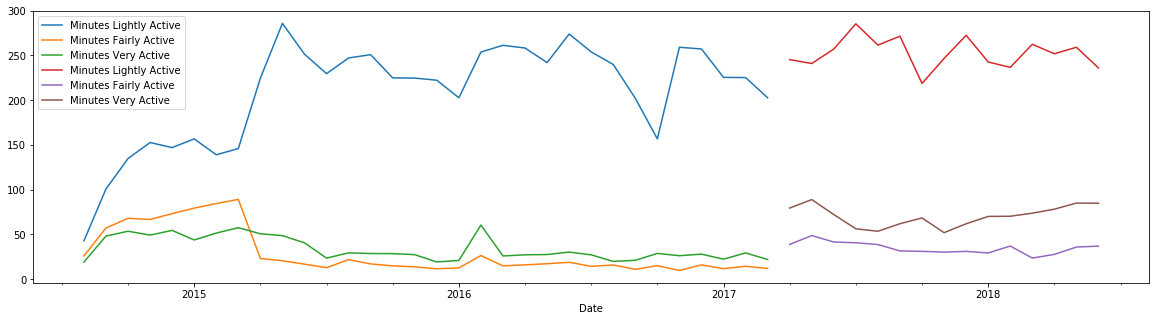

In [9]:
amer_ax = monthly_america.plot(y=['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active'])
monthly_korea.plot(y=['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active'], figsize=(20,5),ax=amer_ax)

In [10]:
#pd.to_numeric(america['Calories Burned'], errors='coerce')
america.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 974 entries, 2014-08-01 to 2017-03-31
Data columns (total 9 columns):
Calories Burned           974 non-null object
Steps                     974 non-null object
Distance                  974 non-null float64
Floors                    974 non-null int64
Minutes Sedentary         974 non-null object
Minutes Lightly Active    974 non-null int64
Minutes Fairly Active     974 non-null int64
Minutes Very Active       974 non-null int64
Activity Calories         974 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 76.1+ KB


In [128]:
america

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-08-01,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-02,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-03,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-04,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-05,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-06,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-07,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-08,"1,344",0,0.00,0,"1,440",0,0,0,0
2014-08-09,"1,349",8,0.00,0,"1,439",1,0,0,2
